# PCA

主成分分析（**Principal components analysis**）

PCA是一种常见的数据分析方式，常用于高维数据的降维，降维在一定的信息损失范围内，可以为我们节省大量的时间和成本。

- 使得数据集更易使用。
- 降低算法的计算开销。
- 去除噪声。
- 使得结果容易理解。
  
这里有一个二维的数据

|  x   |  y   |
| :--: | :--: |
| 2.5  | 2.4  |
| 0.5  | 0.7  |
| 2.2  | 2.9  |
| 1.9  | 2.2  |
| 3.1  | 3.0  |
| 2.3  | 2.7  |
|  2   | 1.6  |
|  1   | 1.1  |
| 1.5  | 1.6  |
| 1.1  | 0.9  |

In [11]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
data = np.mat([[2.5,2.4],[0.5,0.7],[2.2,2.9],[1.9,2.2],[3.1,3.0],[2.3,2.7],
                [2,1.6],[1,1.1],[1.5,1.6],[1.1,0.9]])
data

matrix([[2.5, 2.4],
        [0.5, 0.7],
        [2.2, 2.9],
        [1.9, 2.2],
        [3.1, 3. ],
        [2.3, 2.7],
        [2. , 1.6],
        [1. , 1.1],
        [1.5, 1.6],
        [1.1, 0.9]])

[1.81 1.91]


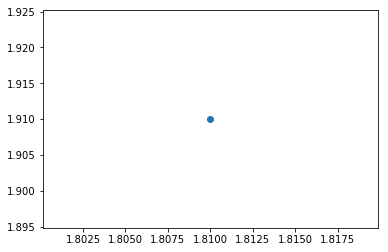

In [13]:
mean_data = data.A.mean(axis=0)
print(mean_data)
plt.scatter(mean_data[0], mean_data[1])

In [14]:
def pca(date_mat, max_rank=200):
    date_mat = np.float32(np.mat(date_mat))
    mean_value = np.mean(date_mat, axis=0)
    mean_removed = date_mat - mean_value
    cov_mat = np.cov(mean_removed, rowvar=0)
    eig_vals, eig_vects = np.linalg.eig(cov_mat)
    sort_vals = np.argsort(eig_vals)
    select_vals = sort_vals[: -(max_rank + 1): -1]
    select_vects = eig_vects[:, select_vals]
    lowD = mean_removed * select_vects
    reconMat = (lowD * select_vects.T) + mean_value
    return lowD, select_vects, mean_value, eig_vects, reconMat

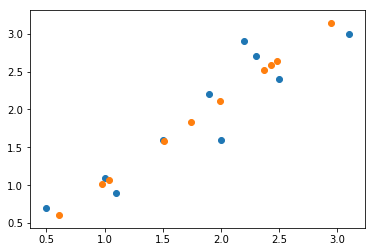

In [15]:
lowD, select, mean_value, select_vects, reconMat = pca(data, 1 )
data_mat = np.mat(data)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data_mat[:,0].flatten().A[0], data_mat[:,1].flatten().A[0])
ax.scatter(reconMat[:,0].A, reconMat[:,1].flatten().A)

# 实验结果

## ORL数据库

图像112 * 92 

40人每人10幅图像

不同数量训练样本下ORL人脸数据库中的识别率比较

| 训练样本 | 正确识别个数 | 总个数 | 识别率/% |
| -------- | ------------ | ------ | -------- |
| 1        | 247          | 360    | 61.1     |
| 2        | 257          | 320    | 80.3     |
| 3        | 261          | 280    | 93.2     |
| 4        | 229          | 240    | 95.4     |
| 5        | 182          | 200    | 91.0     |
| 6        | 150          | 160    | 93.8     |
| 7        | 117          | 120    | 97.5     |
| 8        | 76           | 80     | 95.0     |
| 9        | 39           | 40     | 97.5     |

不同特征维数在ORL人脸数据库重的识别率比较

| 选取子空间维数 | 正确识别 | 识别率/% |
| -------------- | -------- | -------- |
| 1              | 25       | 12.5     |
| 11             | 194      | 97.0     |
| 21             | 197      | 98.5     |
| 31             | 197      | 98.5     |
| 41             | 192      | 96.0     |
| 51             | 194      | 97.0     |
| 61             | 194      | 97.0     |
| 71             | 195      | 97.5     |
| 81             | 193      | 96.5     |
| 91             | 193      | 96.5     |

## YALE数据库
不同数量训练样本下YALE人脸数据库中的识别率比较

| 训练样本 | 正确识别个数 | 总个数 | 识别率/% |
| -------- | ------------ | ------ | -------- |
| 1        | 103          | 150    | 68.7     |
| 2        | 93           | 135    | 68.9     |
| 3        | 88           | 120    | 73.3     |
| 4        | 97           | 105    | 92.4     |
| 5        | 82           | 90     | 91.1     |
| 6        | 72           | 75     | 96.0     |
| 7        | 54           | 60     | 90.0     |
| 8        | 43           | 45     | 95.6     |
| 9        | 28           | 30     | 93.3     |

不同特征维数在YALE人脸数据库重的识别率比较

| 选取子空间维数 | 正确识别 | 识别率/% |
| -------------- | -------- | -------- |
| 1              | 55       | 27.5     |
| 11             | 129      | 64.5     |
| 21             | 122      | 61.0     |
| 31             | 136      | 68.0     |
| 41             | 125      | 62.5     |
| 51             | 131      | 65.5     |
| 61             | 128      | 64.0     |
| 71             | 135      | 67.5     |
| 81             | 148      | 74.0     |
| 91             | 122      | 61.0     |


